# Unsupervised Learning and Preprocessing

In this chapter, I'll study unsupervised learning algo. In this context, our learner have no answers to learn from. Therefore, we just have the data and the hope that our ML algo will discover some pattern in data structure.

Basically, We'll go though two kinds of unsupervised techniques: (1) unsupervised transformations and (2) clustering algorithms.

Some examples of (1) are dimensionality reduction and topic extraction. In this case, we want to summarize our data to fit it in our brains someway.
With (2) we want to identify groups in the dataset according to some criteria. Famous clustering algo. include k-means and dbscan.

# Why is is hard?

The problem with unsupervised learning is the evaluation. How to know the right answer if there is no right answer?
Usually, the only way to evaluate the results is exploring it manually.

Clustering techniques are frequentely used as exploratory data analysis tools and in the preprocessing step, to derive a new representation of the data.

# Preprocessing and Scaling

Some supervised learning algorithms (such as neural network and SVMs) are very sensitive to the scaling of the data. Here we'll explore the following scaling methods. 

(1) *StandardScaler*: transforms the distribution such that the new mean is 0 and the variance is 1. It does that by replacing each value with its corresponding standard score (z value).

(2) *RobustScaler*: similar to StandardScaler, but it uses the median and quartiles, instead of mean and variance. Unlike StandardScaler, it ignores outliers.

(3) *MinMaxScaler*: ensures the new data values are exactly between 0 and 1 by shifting the data.

(4) *Normalizer*: scales each data point such that the feature vector has a Euclidean length of 1. It is used when only the direction of the data matters.

The figure below, shows us that the same data can be represented in several ways according to the scaling adopted.

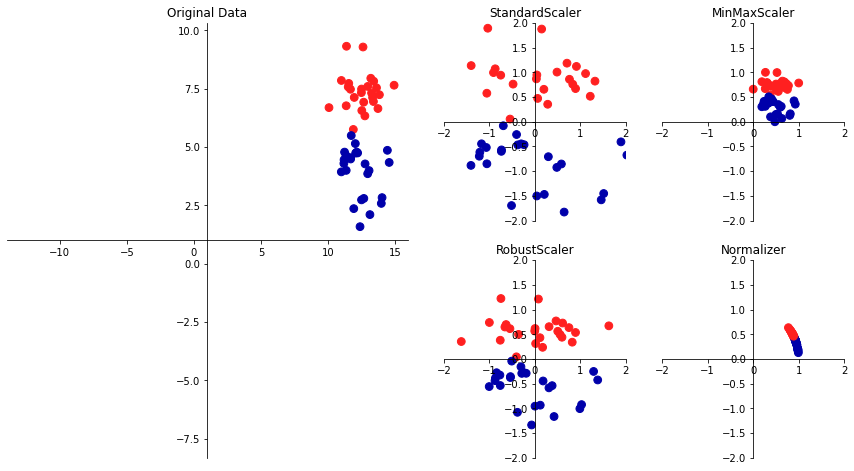

In [1]:
import mglearn
mglearn.plots.plot_scaling()

# Applying Data Transformations

Pre-processing methods are applied before supervised learning.

In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

# Scale the data
scaler = MinMaxScaler()
scaler.fit(X_train)

# Transform the train data
X_train_scaled = scaler.transform(X_train)

# print dataset properties before and after scaling}
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}\n".format(X_train_scaled.max(axis=0)))

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}\n".format(X_test_scaled.max(axis=0)))

# Apply Supervised Learning Algorithm (SVM)
svm = SVC(C=100, kernel='rbf')

svm.fit(X_train, y_train)
print("Test set accuracy (No scaling): {:.2f}".format(svm.score(X_test, y_test)))

svm.fit(X_train_scaled, y_train)
print("Test set accuracy (MinMaxScaling): {:.2f}".format(svm.score(X_test_scaled, y_test)))

per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]

per-feature minimum after scaling:
[ 0.0336031   0.0226

## Fit to the training set and apply to the test set

It's very important to notice that the scaling method should be fitted to the training data and applied to the test set. We shouldn't use the test set to fit the scaling method.

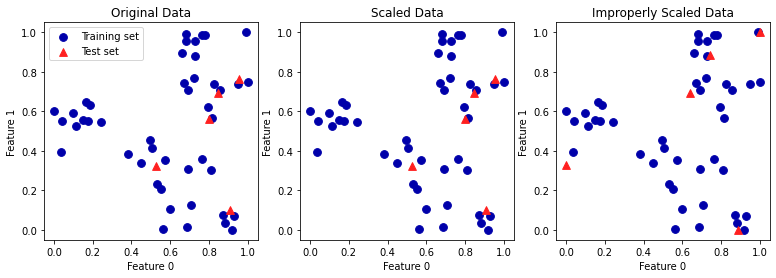

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2) # split it into training and test sets
X = MinMaxScaler().fit_transform(X)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], color=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', color=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', color=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', color=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1");

Note that, scaling all the data leads to wrong results (compare the figures and note how "Improperly Scaled Data" looks different).

# The effect of pre-processing on supervised learning

### No Scaling

In [11]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
random_state=0)

svm = SVC(C=100, kernel='rbf')
svm.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


### MinMaxScaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format( svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


### StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler

# preprocessing using zero mean and unit variance scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


Applying scaling methods to the data is very simple, fast and can lead to better accuracy results. 